In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/pima_indians_diabetes.csv")

df = pd.DataFrame(data)

df


,preg,plas,pres,skin,insu,mass,pedi,age,test
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


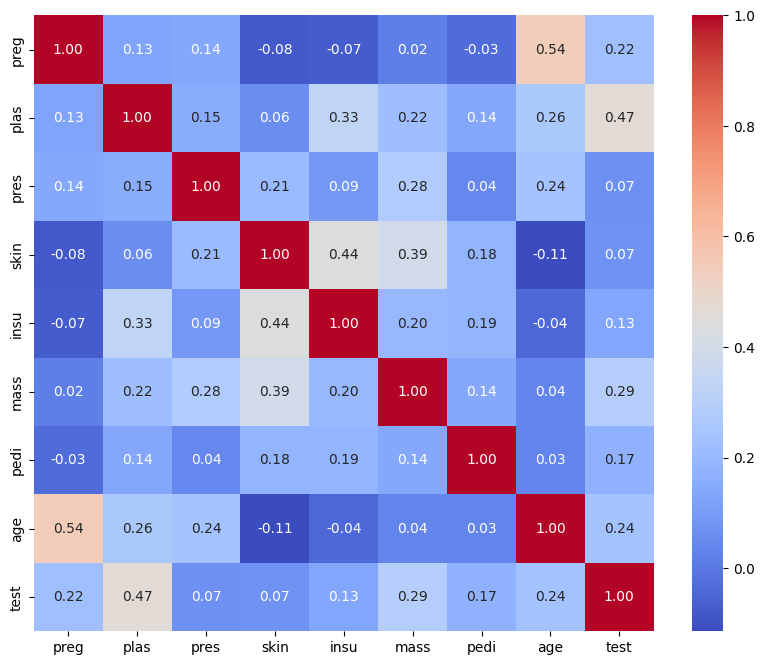

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM with a linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Make predictions
y_pred_linear = svm_linear.predict(X_test)

# Evaluate the model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f'Accuracy with linear kernel: {accuracy_linear:.2f}')


Accuracy with linear kernel: 0.76


In [ ]:
from sklearn.metrics import accuracy_score , classification_report

accuracy = accuracy_score(y_test, y_pred_linear)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred_linear)
print(f'Classification Report:\n{report}')

Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [ ]:
# Initialize the SVM with a polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, random_state=42)  # degree is the polynomial degree
svm_poly.fit(X_train, y_train)

# Make predictions
y_pred_poly = svm_poly.predict(X_test)

# Evaluate the model
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f'Accuracy with polynomial kernel: {accuracy_poly:.2f}')


Accuracy with polynomial kernel: 0.75


In [ ]:
# Initialize the SVM with an RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)  # gamma='scale' is a default option
svm_rbf.fit(X_train, y_train)

# Make predictions
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate the model
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'Accuracy with RBF kernel: {accuracy_rbf:.2f}')


Accuracy with RBF kernel: 0.73


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.77
